### Use SBERT to do embedding for me, and apply LR

### 1.1. Load each dataset (train, development, test).


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import pickle
import numpy as np
from tqdm import tqdm

### 1.2. Generate SBERT embeddings for each dataset.


In [2]:
%%time
data = pd.read_csv('20K_test_set.csv')
model = SentenceTransformer('all-MiniLM-L6-v2')

test_embeddings = model.encode(data['Sentence'].tolist(), convert_to_tensor=False)

CPU times: user 3min 55s, sys: 44.7 s, total: 4min 40s
Wall time: 2min


In [3]:
%%time
with open('test_embeddings.pkl', 'wb') as f:
    pickle.dump(test_embeddings, f)

CPU times: user 24.1 ms, sys: 193 ms, total: 217 ms
Wall time: 376 ms


Print to make sure all is ok so far.

In [6]:
with open('test_embeddings.pkl', 'rb') as f:
    test_embeddings = pickle.load(f)

print("First embedding:", test_embeddings[0])
print("Shape/Length of first embedding:", len(test_embeddings[0]))

First embedding: [ 9.11856163e-03 -4.47563417e-02  5.87600954e-02 -1.81896612e-02
 -1.51282877e-01 -4.60152552e-02  8.10612962e-02  3.77866141e-02
 -1.32820103e-02  5.53740598e-02  8.40154383e-03 -2.30060667e-02
 -3.33225578e-02 -2.93537546e-02 -5.71298115e-02  2.07510274e-02
 -5.15412576e-02 -6.99211657e-02  4.32257503e-02  7.26956576e-02
 -4.60451394e-02 -1.41243383e-01 -8.47623404e-03 -3.24155614e-02
 -1.80014948e-04  4.66822833e-02  8.64930600e-02  7.50683993e-03
 -2.13331487e-02 -6.04886608e-03 -5.24996370e-02 -9.60208923e-02
 -5.37510253e-02 -3.75793092e-02 -9.50987171e-03 -2.16721501e-02
 -2.14735437e-02  3.79567081e-03  4.73013967e-02  1.01758167e-01
 -5.68584874e-02  4.99271601e-02 -1.47951134e-02  1.15215257e-02
 -3.25167552e-02 -1.10752368e-02 -6.52184412e-02 -3.75077538e-02
  2.52358485e-02 -4.78533916e-02 -7.68651068e-02 -3.23524699e-02
  1.22289769e-02 -1.39875017e-04 -4.05414738e-02  1.80147067e-02
 -3.10993195e-02 -2.85615586e-02  1.04674183e-01 -1.61091350e-02
 -7.1610

This will print something like (N, D) where N is the number of sentences and D is the dimension of each embedding vector. please note that dimension of embedding vector is 384 for 'all-MiniLM-L6-v2' model according to their library.

In [10]:
with open('test_embeddings.pkl', 'rb') as f:
    test_embeddings = pickle.load(f)
# Convert embeddings to a numpy array
test_embeddings_array = np.array(test_embeddings)

print("Shape of test embeddings:", test_embeddings_array.shape)

Shape of test embeddings: (202426, 384)


In [5]:
%%time
data = pd.read_csv('200K_train_set.csv')
model = SentenceTransformer('all-MiniLM-L6-v2')

train_embeddings = model.encode(data['Sentence'].tolist(), convert_to_tensor=False)

with open('train_embeddings.pkl', 'wb') as f:
    pickle.dump(train_embeddings, f)

CPU times: user 37min 37s, sys: 7min 32s, total: 45min 10s
Wall time: 18min 15s


In [7]:
%%time
data = pd.read_csv('20K_dev_set.csv')
model = SentenceTransformer('all-MiniLM-L6-v2')

dev_embeddings = model.encode(data['Sentence'].tolist(), convert_to_tensor=False)

with open('dev_embeddings.pkl', 'wb') as f:
    pickle.dump(dev_embeddings, f)

CPU times: user 3min 43s, sys: 43 s, total: 4min 26s
Wall time: 1min 46s


Now I have saved embedding file for each dataset.

### 2.1. Multi-class Text Classification

1- Load the embeddings and labels for each dataset (train, development, test).
2- Train a logistic regression model using the training data.
3- Evaluate the model on the development and test datasets using metrics like F1-score, precision, recall, and generate a confusion matrix.

In [4]:
import pickle
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [5]:
# Load embeddings and labels
def load_data(embeddings_path, data_path):
    with open(embeddings_path, 'rb') as f:
        embeddings = pickle.load(f)
    data = pd.read_csv(data_path)
    labels = data['Label']
    return embeddings, labels

In [6]:
%%time

train_embeddings, train_labels = load_data('train_embeddings.pkl', '200K_train_set.csv')
dev_embeddings, dev_labels = load_data('dev_embeddings.pkl', '20K_dev_set.csv')
test_embeddings, test_labels = load_data('test_embeddings.pkl', '20K_test_set.csv')

CPU times: user 3.39 s, sys: 1.78 s, total: 5.17 s
Wall time: 5.92 s


### 2.2. Train Logistic Regression

In [21]:
# Initialize and train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_embeddings, train_labels)

# Evaluate on the development set
dev_pred = lr_model.predict(dev_embeddings)
print("Development Set Evaluation:")
print("Classification Report:\n", classification_report(dev_labels, dev_pred))
print("Confusion Matrix:\n", confusion_matrix(dev_labels, dev_pred))

# Optionally, evaluate on the test set
test_pred = lr_model.predict(test_embeddings)
print("Test Set Evaluation:")
print("Classification Report:\n", classification_report(test_labels, test_pred))
print("Confusion Matrix:\n", confusion_matrix(test_labels, test_pred))

Development Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

  BACKGROUND       0.36      0.08      0.14     10685
 CONCLUSIONS       0.61      0.69      0.65     39897
     METHODS       0.71      0.76      0.74     59219
   OBJECTIVE       0.42      0.11      0.17      8819
     RESULTS       0.75      0.79      0.77     83857

    accuracy                           0.69    202477
   macro avg       0.57      0.49      0.49    202477
weighted avg       0.67      0.69      0.67    202477

Confusion Matrix:
 [[  908  5509  2125   588  1555]
 [  670 27611  2901   339  8376]
 [  173  2148 45272   260 11366]
 [  419  3662  2636   957  1145]
 [  368  6554 10977   108 65850]]
Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

  BACKGROUND       0.37      0.08      0.14     11287
 CONCLUSIONS       0.60      0.69      0.64     39638
     METHODS       0.71      0.76      0.73     59662
   OBJECTIVE

In [22]:
# Load test data
test_embeddings, test_labels = load_data('test_embeddings.pkl', '20K_test_set.csv')

# Initialize and train logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
train_embeddings, train_labels = load_data('train_embeddings.pkl', '200K_train_set.csv')
lr_model.fit(train_embeddings, train_labels)

# Predict labels and probabilities for the test set
test_pred = lr_model.predict(test_embeddings)
test_prob = lr_model.predict_proba(test_embeddings)

In [19]:
# Calculate sentence-level F1 Score
sentence_f1 = f1_score(test_labels, test_pred, average='macro')
print(f'Sentence-level F1 Score: {sentence_f1:.3f}')

Sentence-level F1 Score: 0.490


In [23]:
classes = np.unique(test_labels)
test_labels_binarized = label_binarize(test_labels, classes=classes)
test_prob = lr_model.predict_proba(test_embeddings)

# Calculate AUC scores
roc_auc = roc_auc_score(test_labels_binarized, test_prob, multi_class='ovr', average="weighted")
pr_auc = average_precision_score(test_labels_binarized, test_prob, average="weighted")
print(f'AUC-ROC: {roc_auc:.3f}, AUC-PR: {pr_auc:.3f}')

AUC-ROC: 0.884, AUC-PR: 0.732


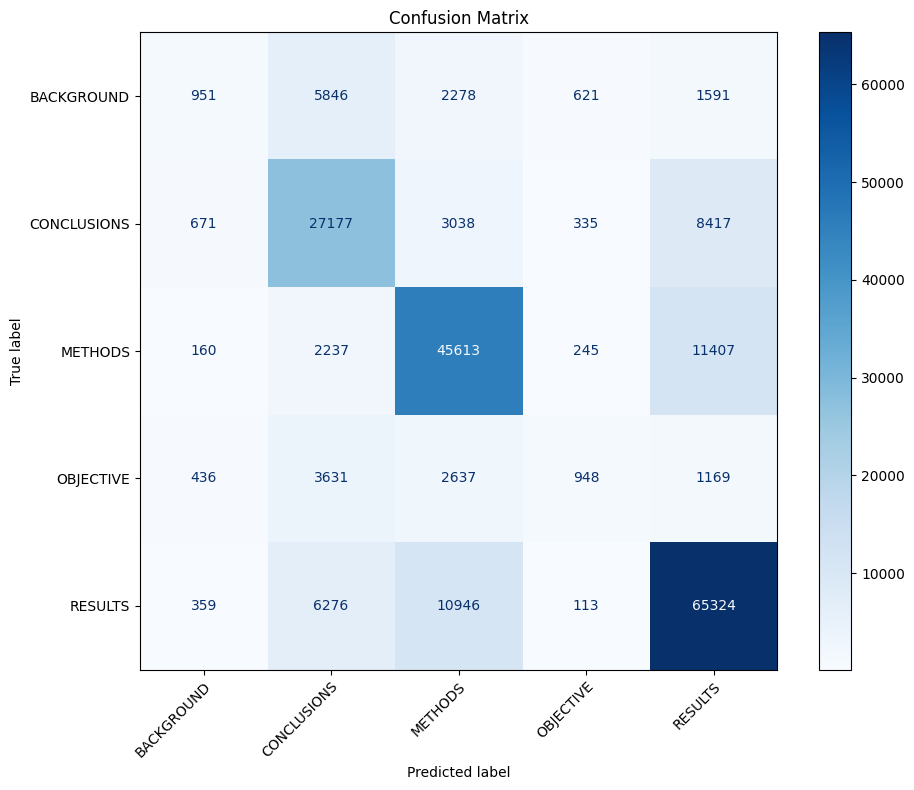

In [21]:
# Confusion matrix calculation and display
cm = confusion_matrix(test_labels, test_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
# Print classification report
print(classification_report(test_labels, test_pred, target_names=classes))

              precision    recall  f1-score   support

  BACKGROUND       0.37      0.08      0.14     11287
 CONCLUSIONS       0.60      0.69      0.64     39638
     METHODS       0.71      0.76      0.73     59662
   OBJECTIVE       0.42      0.11      0.17      8821
     RESULTS       0.74      0.79      0.76     83018

    accuracy                           0.69    202426
   macro avg       0.57      0.49      0.49    202426
weighted avg       0.67      0.69      0.67    202426



### Train SVM

In [23]:
import pickle
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
%%time
# Load data
train_embeddings, train_labels = load_data('train_embeddings.pkl', '200K_train_set.csv')
test_embeddings, test_labels = load_data('test_embeddings.pkl', '20K_test_set.csv')

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

In [8]:
sgd_model.fit(train_embeddings, train_labels)

SGDClassifier(random_state=42)

In [15]:
%%time
# Predict labels for the test set
test_pred = sgd_model.predict(test_embeddings)


CPU times: user 491 ms, sys: 488 ms, total: 979 ms
Wall time: 60.9 ms


Classification Report for SVM:
               precision    recall  f1-score   support

  BACKGROUND       0.22      0.01      0.03     11287
 CONCLUSIONS       0.60      0.62      0.61     39638
     METHODS       0.67      0.78      0.72     59662
   OBJECTIVE       0.32      0.00      0.01      8821
     RESULTS       0.72      0.79      0.76     83018

    accuracy                           0.68    202426
   macro avg       0.51      0.44      0.42    202426
weighted avg       0.64      0.68      0.64    202426



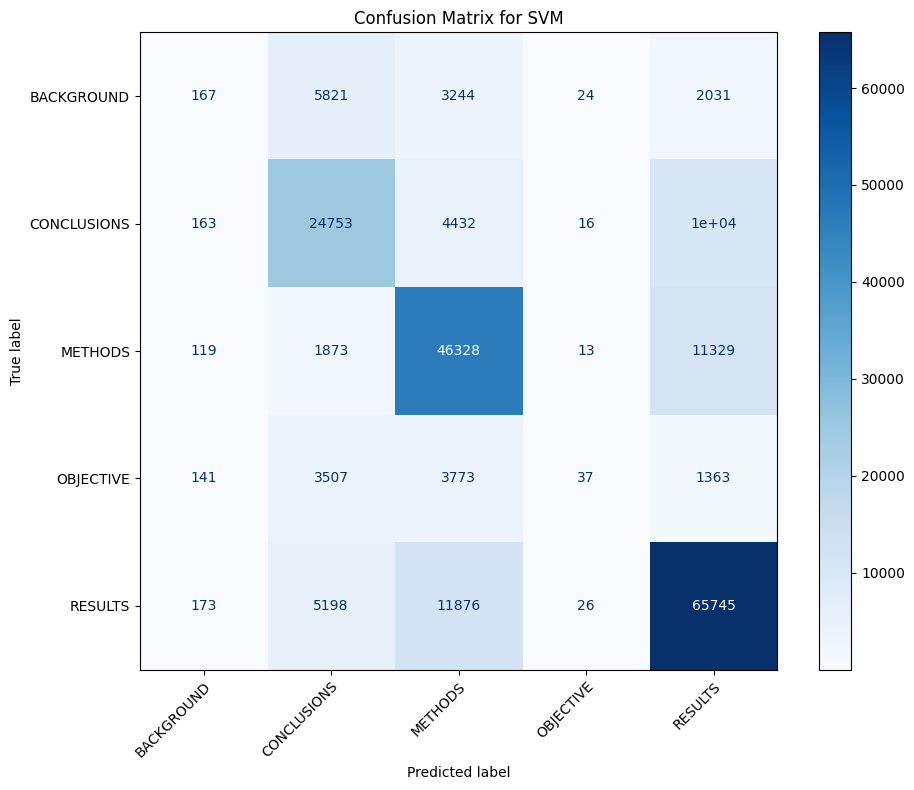

CPU times: user 4.05 s, sys: 321 ms, total: 4.37 s
Wall time: 4.33 s


In [11]:
%%time 
# Evaluation metrics
print("Classification Report for SVM:\n", classification_report(test_labels, test_pred))
cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for SVM')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.tight_layout()
plt.show()

In [12]:
# Calculate sentence-level F1 Score
sentence_f1 = f1_score(test_labels, test_pred, average='macro')
print(f'Sentence-level F1 Score: {sentence_f1:.3f}')

Sentence-level F1 Score: 0.424


In [3]:
classes = np.unique(test_labels)
test_labels_binarized = label_binarize(test_labels, classes=classes)
# test_prob = lr_model.predict_proba(test_embeddings)

# Calculate AUC scores
roc_auc = roc_auc_score(test_labels_binarized, test_prob, multi_class='ovr', average="weighted")
pr_auc = average_precision_score(test_labels_binarized, test_prob, average="weighted")
print(f'AUC-ROC: {roc_auc:.3f}, AUC-PR: {pr_auc:.3f}')

NameError: name 'test_labels' is not defined

In [17]:
# Print classification report
print(classification_report(test_labels, test_pred, target_names=classes))

              precision    recall  f1-score   support

  BACKGROUND       0.22      0.01      0.03     11287
 CONCLUSIONS       0.60      0.62      0.61     39638
     METHODS       0.67      0.78      0.72     59662
   OBJECTIVE       0.32      0.00      0.01      8821
     RESULTS       0.72      0.79      0.76     83018

    accuracy                           0.68    202426
   macro avg       0.51      0.44      0.42    202426
weighted avg       0.64      0.68      0.64    202426

